In [1]:
import numpy as np
import matplotlib.pyplot as plt
from qiskit import BasicAer
from qiskit.aqua.algorithms import VQE
from qiskit.aqua.components.variational_forms import RYRZ
from qiskit.aqua.components.optimizers import SLSQP
from qiskit.chemistry.core import Hamiltonian
from qiskit.chemistry.drivers import PySCFDriver

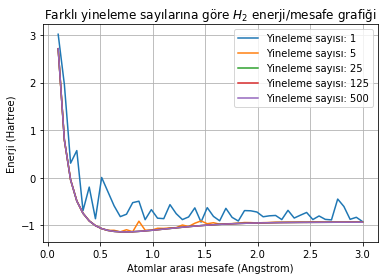

In [2]:
iterations = [1, 5, 25, 125, 500]
distances = np.linspace(0.1, 3.0)
for iteration in iterations:
    energy = []
    for distance in distances:
        backend = BasicAer.get_backend("statevector_simulator")
        driver = PySCFDriver(atom="H .0 .0 .0; H .0 .0 " + str(distance))
        molecule = driver.run()
        repulsion_energy = molecule.nuclear_repulsion_energy
        operator =  Hamiltonian()
        qubit_op = operator.run(molecule)[0]
        var_form = RYRZ(qubit_op.num_qubits)
        optimizer = SLSQP(maxiter=iteration)
        vqe = VQE(qubit_op, var_form, optimizer)
        result = vqe.run(backend)
        lines, result = operator.process_algorithm_result(result)
        energy.append(result['energy'])
    plt.plot(distances, energy, label="Yineleme sayısı: {}".format(iteration))
plt.title(r"Farklı yineleme sayılarına göre $H_{2}$ enerji/mesafe grafiği")
plt.xlabel("Atomlar arası mesafe (Angstrom)")
plt.ylabel("Enerji (Hartree)")
plt.grid()
plt.legend()
plt.show()